<a href="https://colab.research.google.com/github/Arifanalysis/Fabric-class/blob/main/comparision_of_LSTM%2C_LSTM_CNN_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sobouhiarif/fabric-classifications
#kaggle datasets download -d sobouhiarif/fabric-defect-test

Dataset URL: https://www.kaggle.com/datasets/sobouhiarif/fabric-classifications
License(s): unknown
100% 901M/903M [00:07<00:00, 154MB/s]
100% 903M/903M [00:07<00:00, 133MB/s]


In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/fabric-classifications.zip'

# Specify the directory where you want to extract the contents
extract_path = '/content/Fabric FDD/Fabric_classification'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from google.colab import files
import shutil
folder_path = "/content/Fabric FDD/Fabric_classification"
zip_file_path = "/content/fabric-classifications.zip"
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

'/content/fabric-classifications.zip'

Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 784, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,925 (851.27 KB)

 Trainable params: 217,797 (850.77 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2339 - loss: 3.3249 - val_accuracy: 0.2236 - val_loss: 2.4815 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.3283 - loss: 2.3613 - val_accuracy: 0.2515 - val_loss: 2.3234 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4224 - loss: 2.0703 - val_accuracy: 0.3014 - val_loss: 2.1667 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4841 - loss: 1.8650 - val_accuracy: 0.2814 - val_loss: 2.0544 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5325 - loss: 1.6578 - val_accuracy: 0.4511 - val_loss: 1.8902 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5791 - loss: 1.4827 - val_accuracy: 0.4671 - val_loss: 1.7560 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5901 - loss: 1.3680 - val_accur

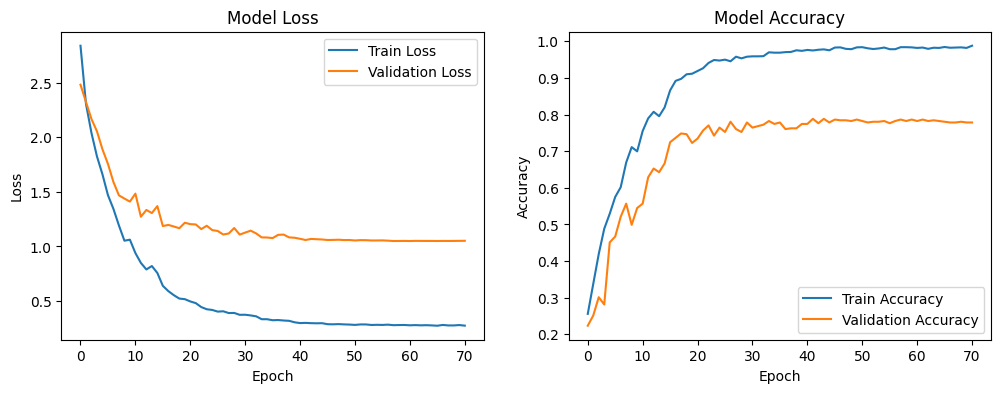

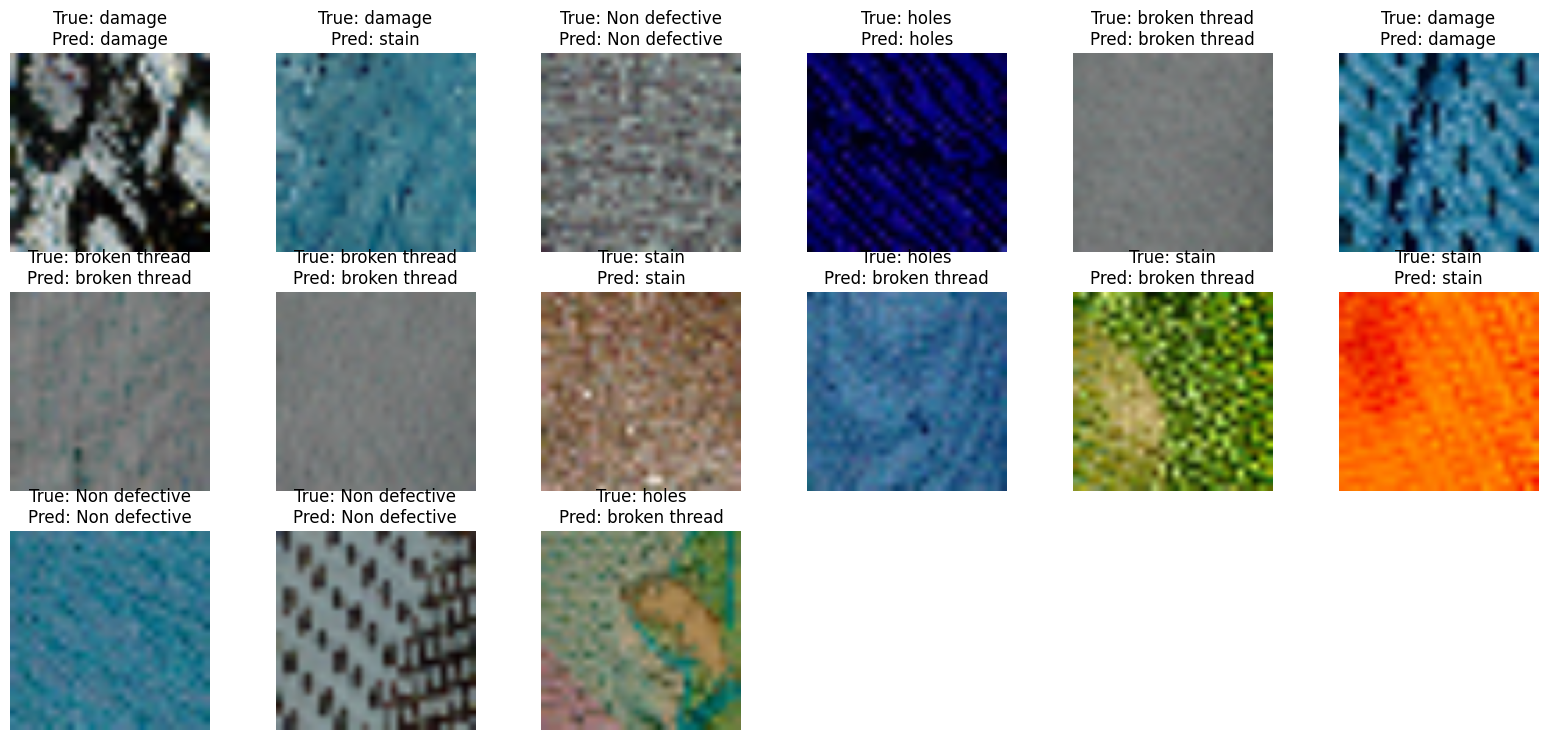

In [ ]:
#LSTM-CNN model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}
    # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the single LSTM-CNN model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))


# Ensure the input dimension is compatible with Conv1D
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and add the output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,229 (266.52 KB)

 Trainable params: 68,229 (266.52 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2052 - loss: 1.6077 - val_accuracy: 0.2216 - val_loss: 1.5634 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.1919 - loss: 1.6100 - val_accuracy: 0.2735 - val_loss: 1.5631 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2500 - loss: 1.5823 - val_accuracy: 0.2794 - val_loss: 1.5484 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2326 - loss: 1.5796 - val_accuracy: 0.2555 - val_loss: 1.5383 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2318 - loss: 1.5842 - val_accuracy: 0.2794 - val_loss: 1.5695 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2290 - loss: 1.5817 - val_accuracy: 0.2675 - val_loss: 1.5770 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.2075 - loss: 1.5958
Epoch 7: 

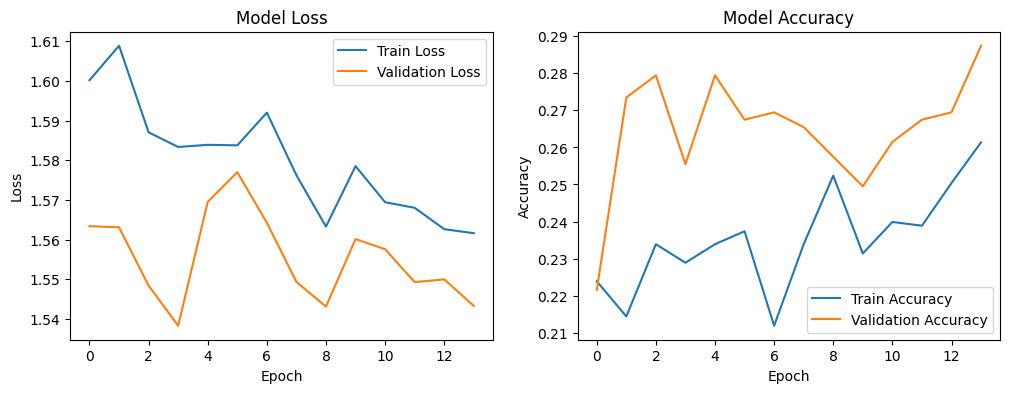

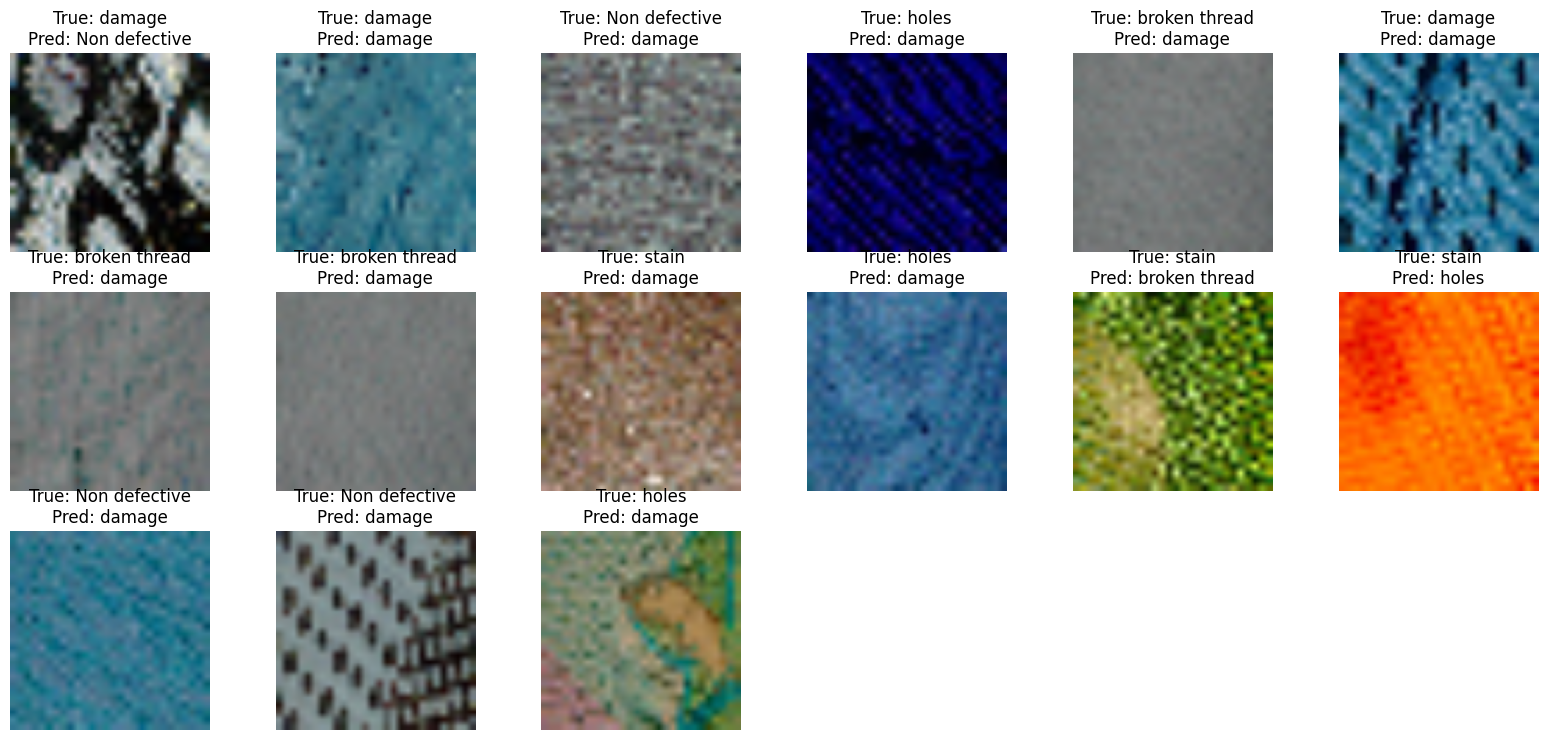

In [ ]:
#single LSTM model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}  # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the single LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 784, 64)             │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,357 (392.02 KB)

 Trainable params: 100,229 (391.52 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 708ms/step - accuracy: 0.2525 - loss: 1.6770 - val_accuracy: 0.1876 - val_loss: 1.6925 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 709ms/step - accuracy: 0.3507 - loss: 1.5413 - val_accuracy: 0.2515 - val_loss: 1.6626 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 670ms/step - accuracy: 0.4123 - loss: 1.4245 - val_accuracy: 0.2894 - val_loss: 1.6580 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 660ms/step - accuracy: 0.4315 - loss: 1.4213 - val_accuracy: 0.2834 - val_loss: 1.6515 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 664ms/step - accuracy: 0.4590 - loss: 1.3235 - val_accuracy: 0.3693 - val_loss: 1.5074 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 685ms/step - accuracy: 0.4697 - loss: 1.3089 - val_accuracy: 0.3972 - val_loss: 1.5461 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 702ms/step - accuracy: 0.4807 - los

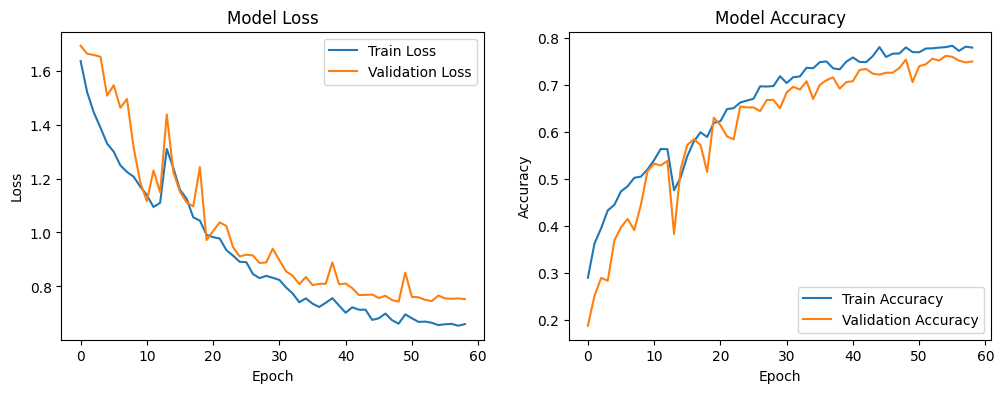

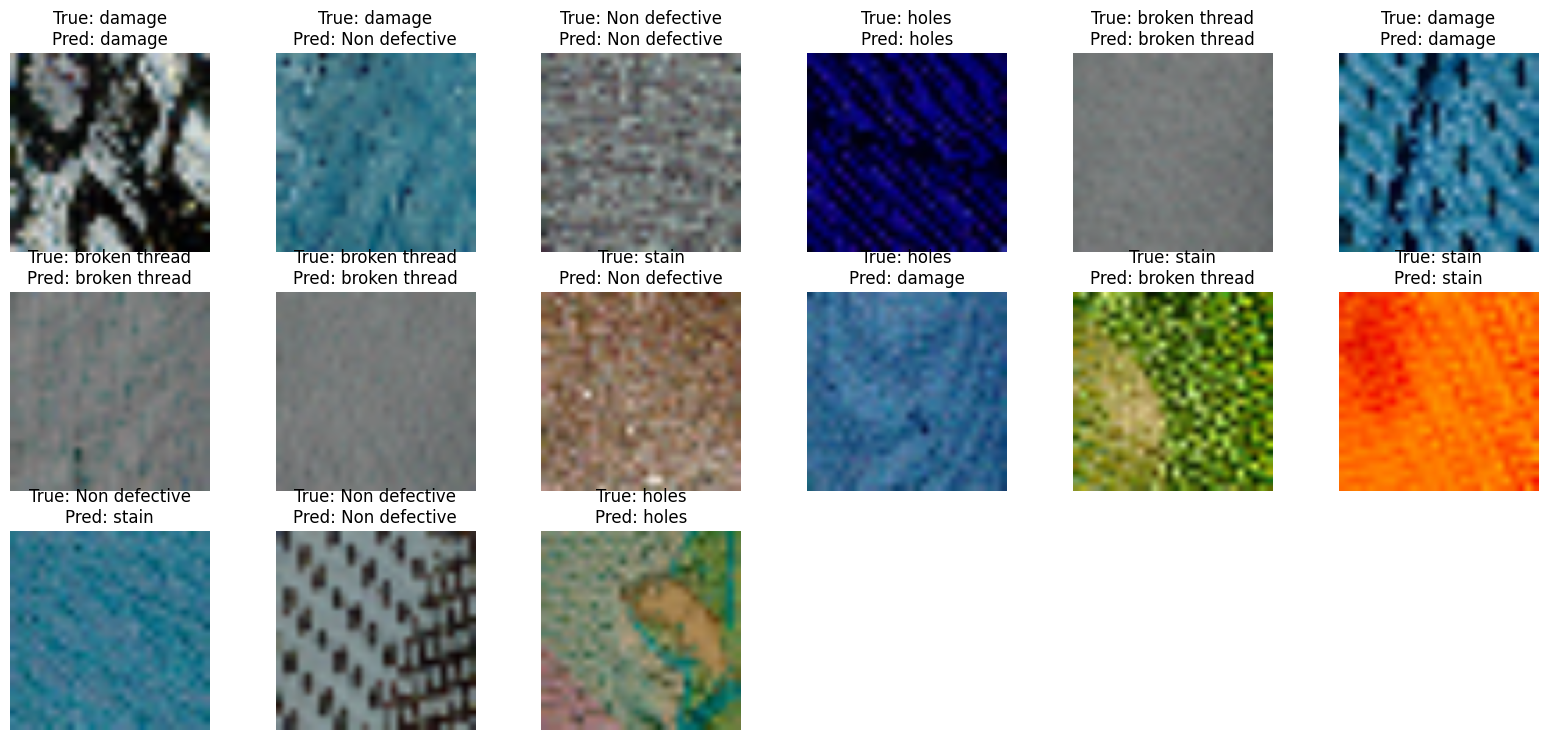

In [ ]:
#CNN-LSTM model
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}  # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the CNN-LSTM model
model = Sequential()

# Add CNN layers
model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Add LSTM layer
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

# Calculate and display accuracy for each category
category_accuracies = {}
for i, category in enumerate(categories):
    category_mask = (trueY_classes == i)
    category_correct = (predY_classes[category_mask] == i).sum()
    category_total = category_mask.sum()
    category_accuracies[category] = category_correct / category_total
    print(f"Accuracy for {category}: {category_accuracies[category]:.2f}")

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize test images with improved pixel quality and ensure class representation
plt.figure(figsize=(20, 15))

# Dictionary to track how many images have been displayed per class
displayed_count = {category: 0 for category in categories}

# Maximum number of images to display per class
max_images_per_class = 3

displayed_images = 0
for i in range(len(testX)):
    true_label = categories[trueY_classes[i]]
    if displayed_count[true_label] < max_images_per_class:
        plt.subplot(5, 6, displayed_images + 1)  # Adjusting the grid for 18 images
        resized_image = cv2.resize(testX[i].reshape(28, 28, 3), (128, 128))  # Rescale for better quality
        plt.imshow(resized_image)
        plt.title(f"True: {true_label}\nPred: {categories[predY_classes[i]]}")
        plt.axis('off')

        displayed_count[true_label] += 1
        displayed_images += 1

    # Break the loop after displaying 18 images (3 images per class, 6 classes)
    if displayed_images >= max_images_per_class * len(categories):
        break

plt.show()
